In [1]:
import os
import pandas as pd
import numpy as np
import random
import math
from decimal import Decimal
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def addValues(ax):
    values = []
    for i in ax.patches: 
        values.append(i.get_height())
    
    total = sum(values)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        #ax.text(i.get_x()-.05, i.get_height()+.1, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        # ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')
        ax.text(i.get_x()+0.15, i.get_height(), str(round(i.get_height(), 3)), ha='center', va='bottom', fontsize=9)

In [3]:
def plotEnergy(mean, std): 
    # mean = dfEnergy.mean()
    # std = dfEnergy.std()
    
    N = len(mean)
    ind = np.arange(N) # the x locations for the groups

    ide, ax = plt.subplots()
    graphEnergy = ax.bar(ind, mean.values(), color='c', yerr = std.values(), capsize=2)

    # Add text for labels, title and axes ticks
    ax.set_ylabel('mean, r.u.')
    ax.set_title('KB Energy per Residue '+model)
    ax.set_xticks(ind)
    ax.set_xticklabels(mean.keys())

    addValues(ax)

    plt.show()
    
    return ide

In [4]:
def plotEntropy(mean, std): 
    # dfEntropy = np.log(df.copy())
    # mean = dfEntropy.mean()
    # std = dfEntropy.std()
    N = len(mean)
    
    ind = np.arange(N) # the x locations for the groups

    ide, ax = plt.subplots()
    graphEntropy = ax.bar(ind, mean.values(), color='orange', yerr = std.values(), capsize=2)

    # Add text for labels, title and axes ticks
    ax.set_ylabel('mean, r.u.')
    ax.set_title('KB Entropy (log) per residue '+model)
    ax.set_xticks(ind)
    ax.set_xticklabels(mean.keys())

    addValues(ax)

    plt.show()
    
    return ide 

In [5]:
def plotEntalpy(mean, std): 
    
    N = len(mean)
    
    ind = np.arange(N) # the x locations for the groups

    ide, ax = plt.subplots()
    graphEntropy = ax.bar(ind, mean.values(), color='mediumseagreen', yerr = std.values(), capsize=2)

    # Add text for labels, title and axes ticks
    ax.set_ylabel('mean, r.u.')
    ax.set_title('KB Free Energy per residue '+model)
    ax.set_xticks(ind)
    ax.set_xticklabels(mean.keys())

    addValues(ax)

    plt.show()
    
    return ide 

In [6]:
def eshPerProt(model, count, name):
    
    os.chdir("C:/Kate/Bioinformatics/Diplom/"+model+"/")
      
    dfNative = pd.DataFrame()
    dfNoptE = pd.DataFrame()
    dfNoptS = pd.DataFrame()
    dfNoptH = pd.DataFrame()
    dfRandom = pd.DataFrame()
    dfRoptE = pd.DataFrame()
    dfRoptS = pd.DataFrame()
    dfRoptH = pd.DataFrame()
    
    # lists to hold the energy (e), entropy (s) and free energy (h) values and the sequences
    enative = []
    erandom = []
    eopten = []
    eopter = []
    eoptsn = []
    eoptsr = []
    eopthn = []
    eopthr = []
    snative = []
    srandom = []
    sopten = []
    sopter = []
    soptsn = []
    soptsr = []
    sopthn = []
    sopthr = []
    hnative = []
    hrandom = []
    hopten = []
    hopter = []
    hoptsn = []
    hoptsr = []
    hopthn = []
    hopthr = []
    seqnative = []
    seqrandom = []
    seqopten = []
    seqopter = []
    seqoptsn = []
    seqoptsr = []
    seqopthn = []
    seqopthr = []
    
    
    repeats = 10
    
    for n in range(repeats):

        # Load data from excel for Native
        file = model+str(count)+'_'+name+'_Native'+str(n)+'.xlsx'
        xf = pd.ExcelFile(file)    
        dfResultsNat = xf.parse('Results')

        # Append the results from Native
        enative.append(dfResultsNat.EperR[0])
        eopten.append(dfResultsNat.EperR[1])
        eoptsn.append(dfResultsNat.EperR[2])
        eopthn.append(dfResultsNat.EperR[3])
        
        snative.append(dfResultsNat.SperR[0])
        sopten.append(dfResultsNat.SperR[1])
        soptsn.append(dfResultsNat.SperR[2])
        sopthn.append(dfResultsNat.SperR[3])
        
        hnative.append(dfResultsNat.HperR[0])
        hopten.append(dfResultsNat.HperR[1])
        hoptsn.append(dfResultsNat.HperR[2])
        hopthn.append(dfResultsNat.HperR[3])
        
        seqnative.append(dfResultsNat.Sequence[0])
        seqopten.append(dfResultsNat.Sequence[1])
        seqoptsn.append(dfResultsNat.Sequence[2])
        seqopthn.append(dfResultsNat.Sequence[3])


        # Load data from excel for Random
        file = model+str(count)+'_'+name+'_Random'+str(n)+'.xlsx'
        xf = pd.ExcelFile(file)    
        dfResultsRand = xf.parse('Results')

        # Append the results from Random
        erandom.append(dfResultsRand.EperR[0])
        eopter.append(dfResultsRand.EperR[1])
        eoptsr.append(dfResultsRand.EperR[2])
        eopthr.append(dfResultsRand.EperR[3])
        
        srandom.append(dfResultsRand.SperR[0])
        sopter.append(dfResultsRand.SperR[1])
        soptsr.append(dfResultsRand.SperR[2])
        sopthr.append(dfResultsRand.SperR[3])

        hrandom.append(dfResultsRand.HperR[0])
        hopter.append(dfResultsRand.HperR[1])
        hoptsr.append(dfResultsRand.HperR[2])
        hopthr.append(dfResultsRand.HperR[3])
        
        seqrandom.append(str(dfResultsRand.Sequence[0]))
        seqopter.append(str(dfResultsRand.Sequence[1]))
        seqoptsr.append(str(dfResultsRand.Sequence[2]))
        seqopthr.append(str(dfResultsRand.Sequence[3]))
        
    dfNative["Energy"] = enative
    dfNative["Entropy"] = snative
    dfNative["Entalpy"] = hnative
    dfNative["Sequence"] = seqnative
    
    dfNoptE["Energy"] = eopten
    dfNoptE["Entropy"] = sopten
    dfNoptE["Entalpy"] = hopten
    dfNoptE["Sequence"] = seqopten
    
    dfNoptS["Energy"] = eoptsn
    dfNoptS["Entropy"] = soptsn
    dfNoptS["Entalpy"] = hoptsn
    dfNoptS["Sequence"] = seqoptsn
    
    dfNoptH["Energy"] = eopthn
    dfNoptH["Entropy"] = sopthn
    dfNoptH["Entalpy"] = hopthn
    dfNoptH["Sequence"] = seqopthn
    
    dfRandom["Energy"] = erandom
    dfRandom["Entropy"] = srandom
    dfRandom["Entalpy"] = hrandom
    dfRandom["Sequence"] = seqrandom
    
    dfRoptE["Energy"] = eopter
    dfRoptE["Entropy"] = sopter
    dfRoptE["Entalpy"] = hopter
    dfRoptE["Sequence"] = seqopter
    
    dfRoptS["Energy"] = eoptsr
    dfRoptS["Entropy"] = soptsr
    dfRoptS["Entalpy"] = hoptsr
    dfRoptS["Sequence"] = seqoptsr
    
    dfRoptH["Energy"] = eopthr
    dfRoptH["Entropy"] = sopthr
    dfRoptH["Entalpy"] = hopthr
    dfRoptH["Sequence"] = seqopthr
    
    # Save in file 
    os.chdir(path)    
    writer = pd.ExcelWriter((model+'_'+str(count)+'_'+name+'_perProtESH.xlsx'), engine='xlsxwriter')
    dfNative.to_excel(writer, 'native')
    dfNoptE.to_excel(writer, 'nOptE')
    dfNoptS.to_excel(writer, 'nOptS')
    dfNoptH.to_excel(writer, 'nOptG')
    dfRandom.to_excel(writer, 'random')
    dfRoptE.to_excel(writer, 'rOptE')
    dfRoptS.to_excel(writer, 'rOptS')
    dfRoptH.to_excel(writer, 'rOptG')
    
    writer.save()

In [19]:
path = 'C:/Kate/Bioinformatics/Diplom/'
os.chdir(path)

file = 'Lists.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
#dfNames = xf.parse('Control10')
dfNames = xf.parse('Set45')

In [25]:
model = 'B3_BE'
#kind = 'control'
kind = 'Set45'

numprots = 45
runs = dfNames.Name[:numprots]
runs

0     1ucs
1     1utg
2     2zeq
3     2uwr
4     1gvp
5     1cdz
6     1bm8
7     3caf
8     1gh2
9     1bet
10    2ppn
11    3s0a
12    1buo
13    1dhn
14    1qto
15    1c44
16    1bgf
17    1msc
18    1bz4
19    1srv
20    4pa1
21    2ywx
22    1emr
23    4e2u
24    1c3g
25    1koe
26    1p7n
27    1cdy
28    1r8n
29    1is1
30    1mf7
31    3b02
32    3sh4
33    1rc9
34    1byi
35    1scz
36    4p9n
37    2cyg
38    1cem
39    1nd7
40    1o5t
41    3ux1
42    1dab
43    1cii
44    4moa
Name: Name, dtype: object

In [26]:
path = 'C:/Kate/Bioinformatics/Diplom/NewResults/'

In [27]:
#model = 'S_A2_AA'
for count, name in enumerate(runs):     
    eshPerProt(model, count, name)

In [28]:
#path = 'C:/Kate/Bioinformatics/Diplom/'

os.chdir(path)

dfNative_all = pd.DataFrame()
dfNoptE_all = pd.DataFrame()
dfNoptS_all = pd.DataFrame()
dfNoptH_all = pd.DataFrame()
dfRandom_all = pd.DataFrame()
dfRoptE_all = pd.DataFrame()
dfRoptS_all = pd.DataFrame()
dfRoptH_all = pd.DataFrame()

for count, name in enumerate(runs):     
    # Load data from excel
    file = model+'_'+str(count)+'_'+name+'_perProtESH.xlsx'
    xf = pd.ExcelFile(file)    
    dfNative = xf.parse('native')
    dfNoptE = xf.parse('nOptE')
    dfNoptS = xf.parse('nOptS')
    dfNoptH = xf.parse('nOptG')
    dfRandom = xf.parse('random')
    dfRoptE = xf.parse('rOptE')
    dfRoptS = xf.parse('rOptS')
    dfRoptH = xf.parse('rOptG')
    
    dfNative_all = dfNative_all.append(dfNative)
    dfNoptE_all = dfNoptE_all.append(dfNoptE)
    dfNoptS_all = dfNoptS_all.append(dfNoptS)
    dfNoptH_all = dfNoptH_all.append(dfNoptH)
    dfRandom_all = dfRandom_all.append(dfRandom)
    dfRoptE_all = dfRoptE_all.append(dfRoptE)
    dfRoptS_all = dfRoptS_all.append(dfRoptS)
    dfRoptH_all = dfRoptH_all.append(dfRoptH)

# Save in file 
os.chdir(path)    

joinedfile = 'ESHperProt_'+model+'_'+kind+'_count'+str(numprots)+'.xlsx'
#joinedfile = 'ESHperProt_'+model+'_Set45_count'+str(numprots)+'.xlsx'

writer = pd.ExcelWriter(joinedfile, engine='xlsxwriter')

dfNative_all.to_excel(writer, 'native')
dfNoptE_all.to_excel(writer, 'nOptE')
dfNoptS_all.to_excel(writer, 'nOptS')
dfNoptH_all.to_excel(writer, 'nOptG')
dfRandom_all.to_excel(writer, 'random')
dfRoptE_all.to_excel(writer, 'rOptE')
dfRoptS_all.to_excel(writer, 'rOptS')
dfRoptH_all.to_excel(writer, 'rOptG')
    
writer.save()

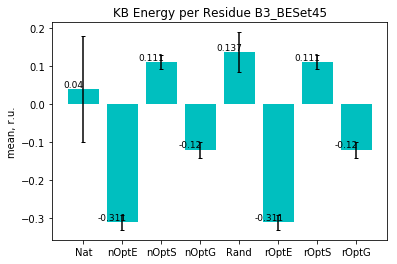

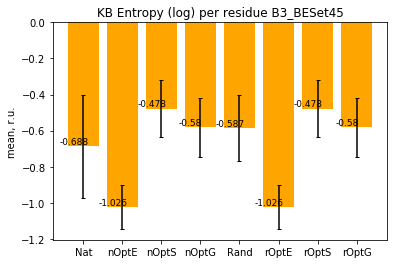

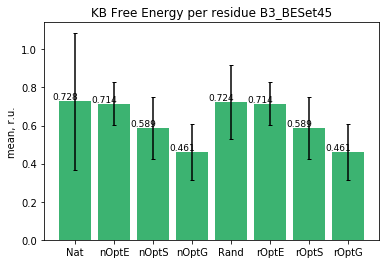

In [29]:
#path = 'C:/Kate/Bioinformatics/Diplom/'

#model = 'S_A2_AA'
os.chdir(path)

# Load data from excel
file = joinedfile


xf = pd.ExcelFile(file)    
dfNative = xf.parse('native')
dfNoptE = xf.parse('nOptE')
dfNoptS = xf.parse('nOptS')
dfNoptH = xf.parse('nOptG')
dfRandom = xf.parse('random')
dfRoptE = xf.parse('rOptE')
dfRoptS = xf.parse('rOptS')
dfRoptH = xf.parse('rOptG')

# Energy mean and std
meanE = dict()
meanE['Nat'] = dfNative.Energy.mean()
meanE['nOptE'] = dfNoptE.Energy.mean()
meanE['nOptS'] = dfNoptS.Energy.mean()
meanE['nOptG'] = dfNoptH.Energy.mean()
meanE['Rand'] = dfRandom.Energy.mean()
meanE['rOptE'] = dfRoptE.Energy.mean()
meanE['rOptS'] = dfRoptS.Energy.mean()
meanE['rOptG'] = dfRoptH.Energy.mean()

stdE = dict()
stdE['Nat'] = dfNative.Energy.std()
stdE['nOptE'] = dfNoptE.Energy.std()
stdE['nOptS'] = dfNoptS.Energy.std()
stdE['nOptG'] = dfNoptH.Energy.std()
stdE['Rand'] = dfRandom.Energy.std()
stdE['rOptE'] = dfRoptE.Energy.std()
stdE['rOptS'] = dfRoptS.Energy.std()
stdE['rOptG'] = dfRoptH.Energy.std()

# Entropy mean and std
meanS = dict()
meanS['Nat'] = dfNative.Entropy.mean()
meanS['nOptE'] = dfNoptE.Entropy.mean()
meanS['nOptS'] = dfNoptS.Entropy.mean()
meanS['nOptG'] = dfNoptH.Entropy.mean()
meanS['Rand'] = dfRandom.Entropy.mean()
meanS['rOptE'] = dfRoptE.Entropy.mean()
meanS['rOptS'] = dfRoptS.Entropy.mean()
meanS['rOptG'] = dfRoptH.Entropy.mean()

stdS = dict()
stdS['Nat'] = dfNative.Entropy.std()
stdS['nOptE'] = dfNoptE.Entropy.std()
stdS['nOptS'] = dfNoptS.Entropy.std()
stdS['nOptG'] = dfNoptH.Entropy.std()
stdS['Rand'] = dfRandom.Entropy.std()
stdS['rOptE'] = dfRoptE.Entropy.std()
stdS['rOptS'] = dfRoptS.Entropy.std()
stdS['rOptG'] = dfRoptH.Entropy.std()

# Entalpy mean and std
meanH = dict()
meanH['Nat'] = dfNative.Entalpy.mean()
meanH['nOptE'] = dfNoptE.Entalpy.mean()
meanH['nOptS'] = dfNoptS.Entalpy.mean()
meanH['nOptG'] = dfNoptH.Entalpy.mean()
meanH['Rand'] = dfRandom.Entalpy.mean()
meanH['rOptE'] = dfRoptE.Entalpy.mean()
meanH['rOptS'] = dfRoptS.Entalpy.mean()
meanH['rOptG'] = dfRoptH.Entalpy.mean()

stdH = dict()
stdH['Nat'] = dfNative.Entalpy.std()
stdH['nOptE'] = dfNoptE.Entalpy.std()
stdH['nOptS'] = dfNoptS.Entalpy.std()
stdH['nOptG'] = dfNoptH.Entalpy.std()
stdH['Rand'] = dfRandom.Entalpy.std()
stdH['rOptE'] = dfRoptE.Entalpy.std()
stdH['rOptS'] = dfRoptS.Entalpy.std()
stdH['rOptG'] = dfRoptH.Entalpy.std()

model = model+kind
ideE = plotEnergy(meanE, stdE)
ideS = plotEntropy(meanS, stdS)
ideH = plotEntalpy(meanH, stdH)

os.chdir(path) 
ideE.savefig('energy_'+model+'_count'+str(numprots)+'.png', dpi=1500)
ideS.savefig('entropy_'+model+'_count'+str(numprots)+'.png', dpi=1500)
ideH.savefig('free_energy'+model+'_count'+str(numprots)+'.png', dpi=1500)
